In [3]:
pip install scanorama

  Using cached annoy-1.17.0.tar.gz (646 kB)
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-2.1.0-py3-none-any.whl size=27626 sha256=276f8df96c6b7e8447e0b00b7db3fadb655d84f78a0fc0213dccae3b7d8eacf1
  Stored in directory: /Users/sadeq/Library/Caches/pip/wheels/5c/8d/1d/6fec2ff22abadf3800714acba26cfa5d326d92343e52b2192a
  Created wheel for annoy: filename=annoy-1.17.0-cp38-cp38-macosx_10_12_x86_64.whl size=72683 sha256=573f72177d6edc48b0d6471822b7c652d156bd781c3ba5bb78b051ca03d8404a
  Stored in directory: /Users/sadeq/Library/Caches/pip/wheels/77/01/de/4421524f9997a25dfa7291121565d12ef514154945e80e907a
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11375 sha256=2a5cb38a35dbf37cf443a92323260b805337f7e21a616b934a861030fc03a529
  Stored in directory: /Users/sadeq/Library/Caches/pip/wheels/b4/3b/77/a06a07a415b222f47a7e522333f85ce64c0defd07a57

In [4]:
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scanorama

In [5]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.8
scanpy      1.8.2
sinfo       0.3.4
-----
PIL                 8.2.0
annoy               NA
anyio               NA
appnope             0.1.2
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bottleneck          1.3.2
brotli              NA
cairo               1.20.1
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz   

In [6]:
adata_spatial_anterior = sc.datasets.visium_sge(
    sample_id="V1_Mouse_Brain_Sagittal_Anterior"
)
adata_spatial_posterior = sc.datasets.visium_sge(
    sample_id="V1_Mouse_Brain_Sagittal_Posterior"
)

  0%|          | 0.00/8.81M [00:00<?, ?B/s]

  0%|          | 0.00/19.6M [00:00<?, ?B/s]

reading /Users/sadeq/Desktop/scanpy-practice/data/V1_Mouse_Brain_Sagittal_Anterior/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  0%|          | 0.00/9.26M [00:00<?, ?B/s]

  0%|          | 0.00/20.1M [00:00<?, ?B/s]

reading /Users/sadeq/Desktop/scanpy-practice/data/V1_Mouse_Brain_Sagittal_Posterior/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [7]:
adata_spatial_anterior.var_names_make_unique()
adata_spatial_posterior.var_names_make_unique()
sc.pp.calculate_qc_metrics(adata_spatial_anterior, inplace=True)
sc.pp.calculate_qc_metrics(adata_spatial_posterior, inplace=True)

/Users/sadeq/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sadeq/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sadeq/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

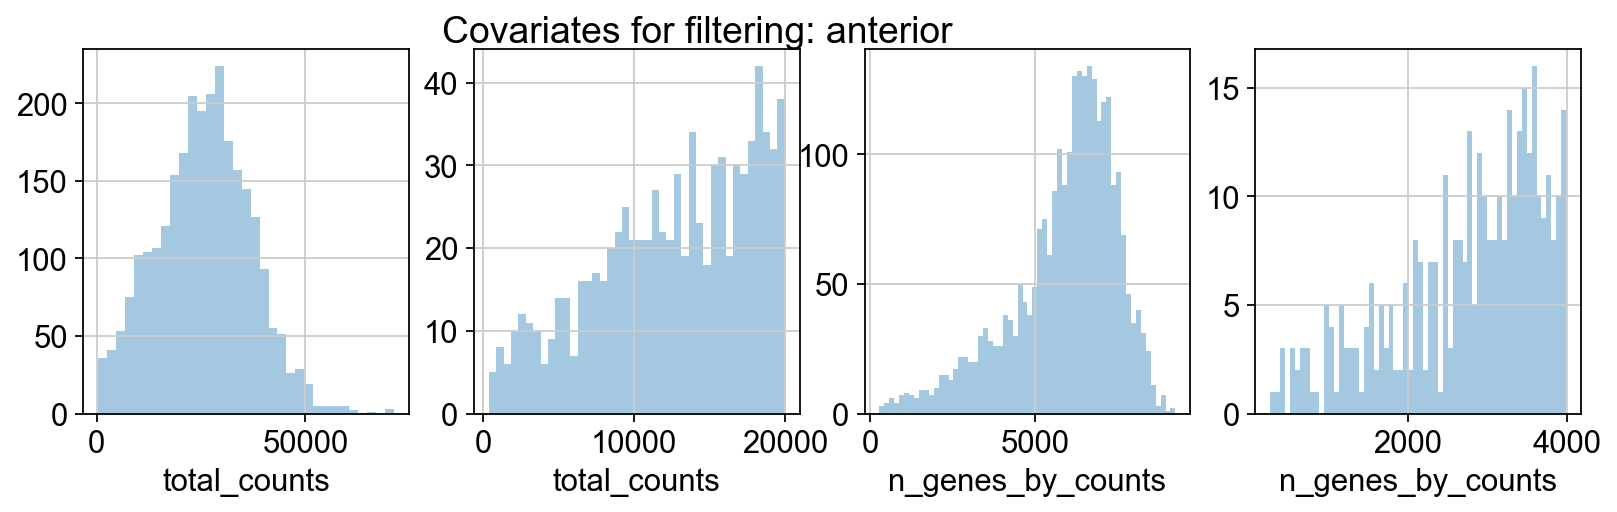

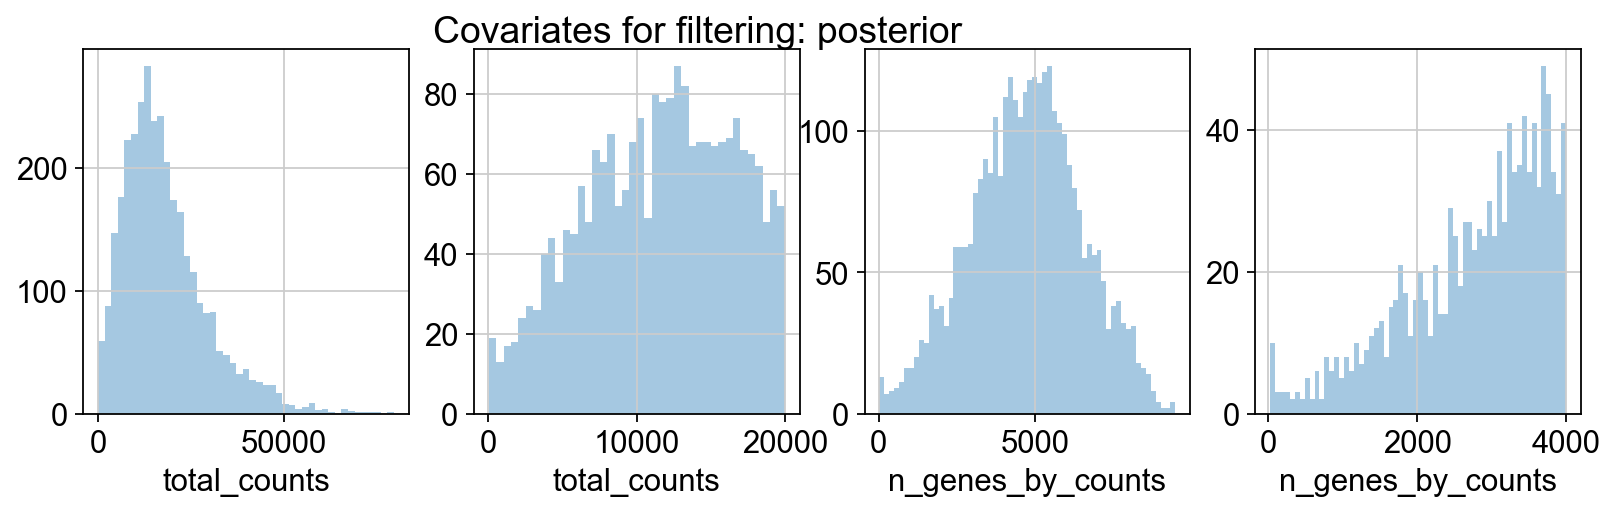

In [8]:
for name, adata in [
    ("anterior", adata_spatial_anterior),
    ("posterior", adata_spatial_posterior),
]:
    fig, axs = plt.subplots(1, 4, figsize=(12, 3))
    fig.suptitle(f"Covariates for filtering: {name}")

    sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
    sns.distplot(
        adata.obs["total_counts"][adata.obs["total_counts"] < 20000],
        kde=False,
        bins=40,
        ax=axs[1],
    )
    sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
    sns.distplot(
        adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000],
        kde=False,
        bins=60,
        ax=axs[3],
    )

In [9]:
for adata in [
    adata_spatial_anterior,
    adata_spatial_posterior,
]:
    sc.pp.normalize_total(adata, inplace=True)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000, inplace=True)

normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [10]:
adatas = [adata_spatial_anterior, adata_spatial_posterior]
adatas_cor = scanorama.correct_scanpy(adatas, return_dimred=True)

Found 32285 genes among all datasets
[[0.         0.47958271]
 [0.         0.        ]]
Processing datasets (0, 1)


In [11]:
adata_spatial = adatas_cor[0].concatenate(
    adatas_cor[1],
    batch_key="library_id",
    uns_merge="unique",
    batch_categories=[
        k
        for d in [
            adatas_cor[0].uns["spatial"],
            adatas_cor[1].uns["spatial"],
        ]
        for k, v in d.items()
    ],
)

In [12]:
sc.pp.neighbors(adata_spatial, use_rep="X_scanorama")
sc.tl.umap(adata_spatial)
sc.tl.leiden(adata_spatial, key_added="clusters")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:21)
running Leiden clustering
    finished: found 21 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:03)


... storing 'feature_types' as categorical
... storing 'genome' as categorical


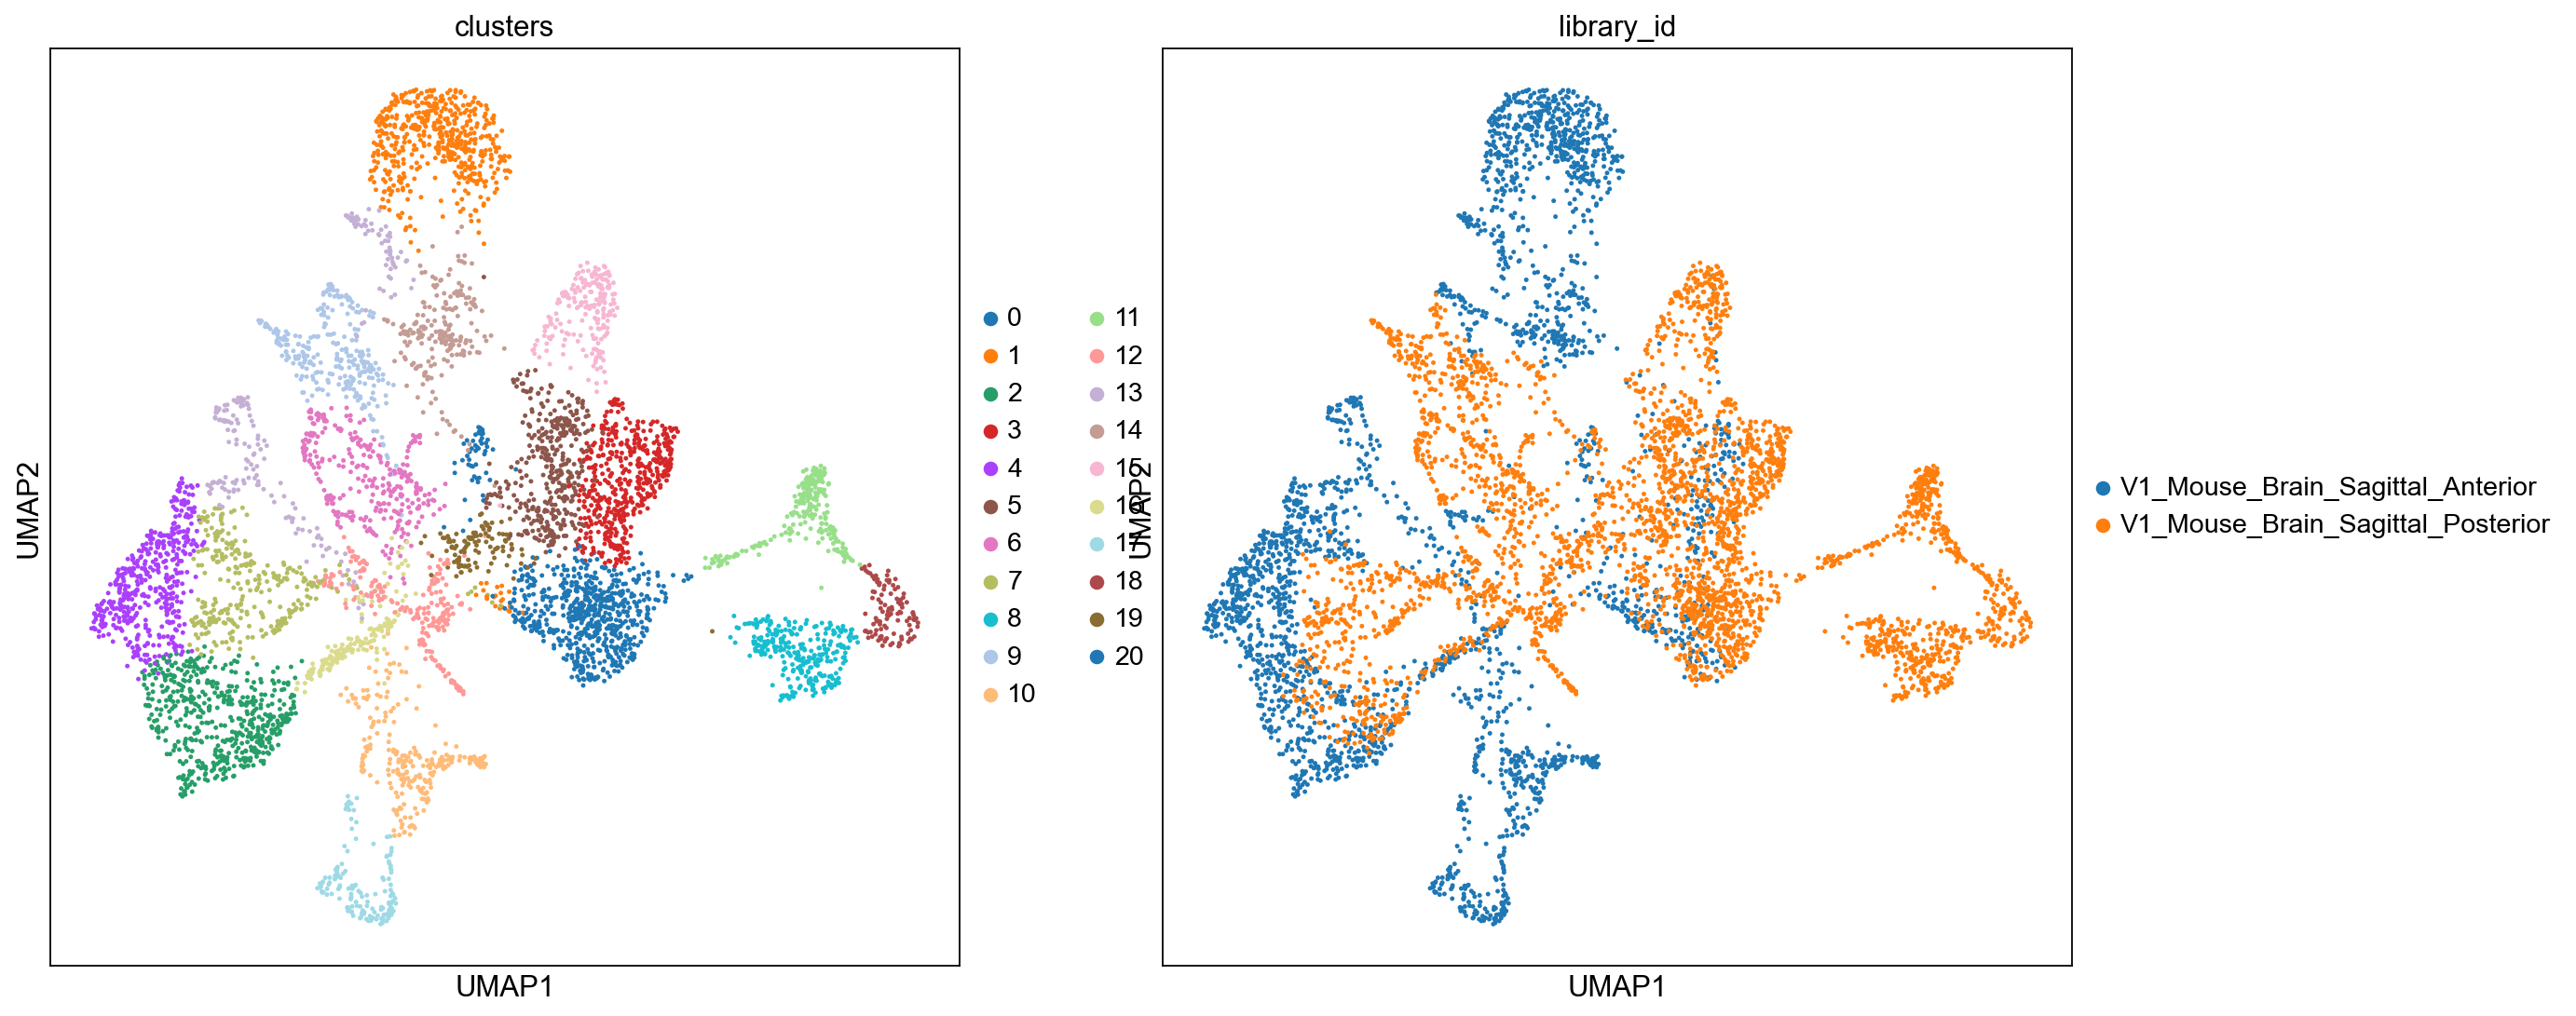

In [13]:
sc.pl.umap(
    adata_spatial, color=["clusters", "library_id"], palette=sc.pl.palettes.default_20
)

In [14]:
clusters_colors = dict(
    zip([str(i) for i in range(18)], adata_spatial.uns["clusters_colors"])
)

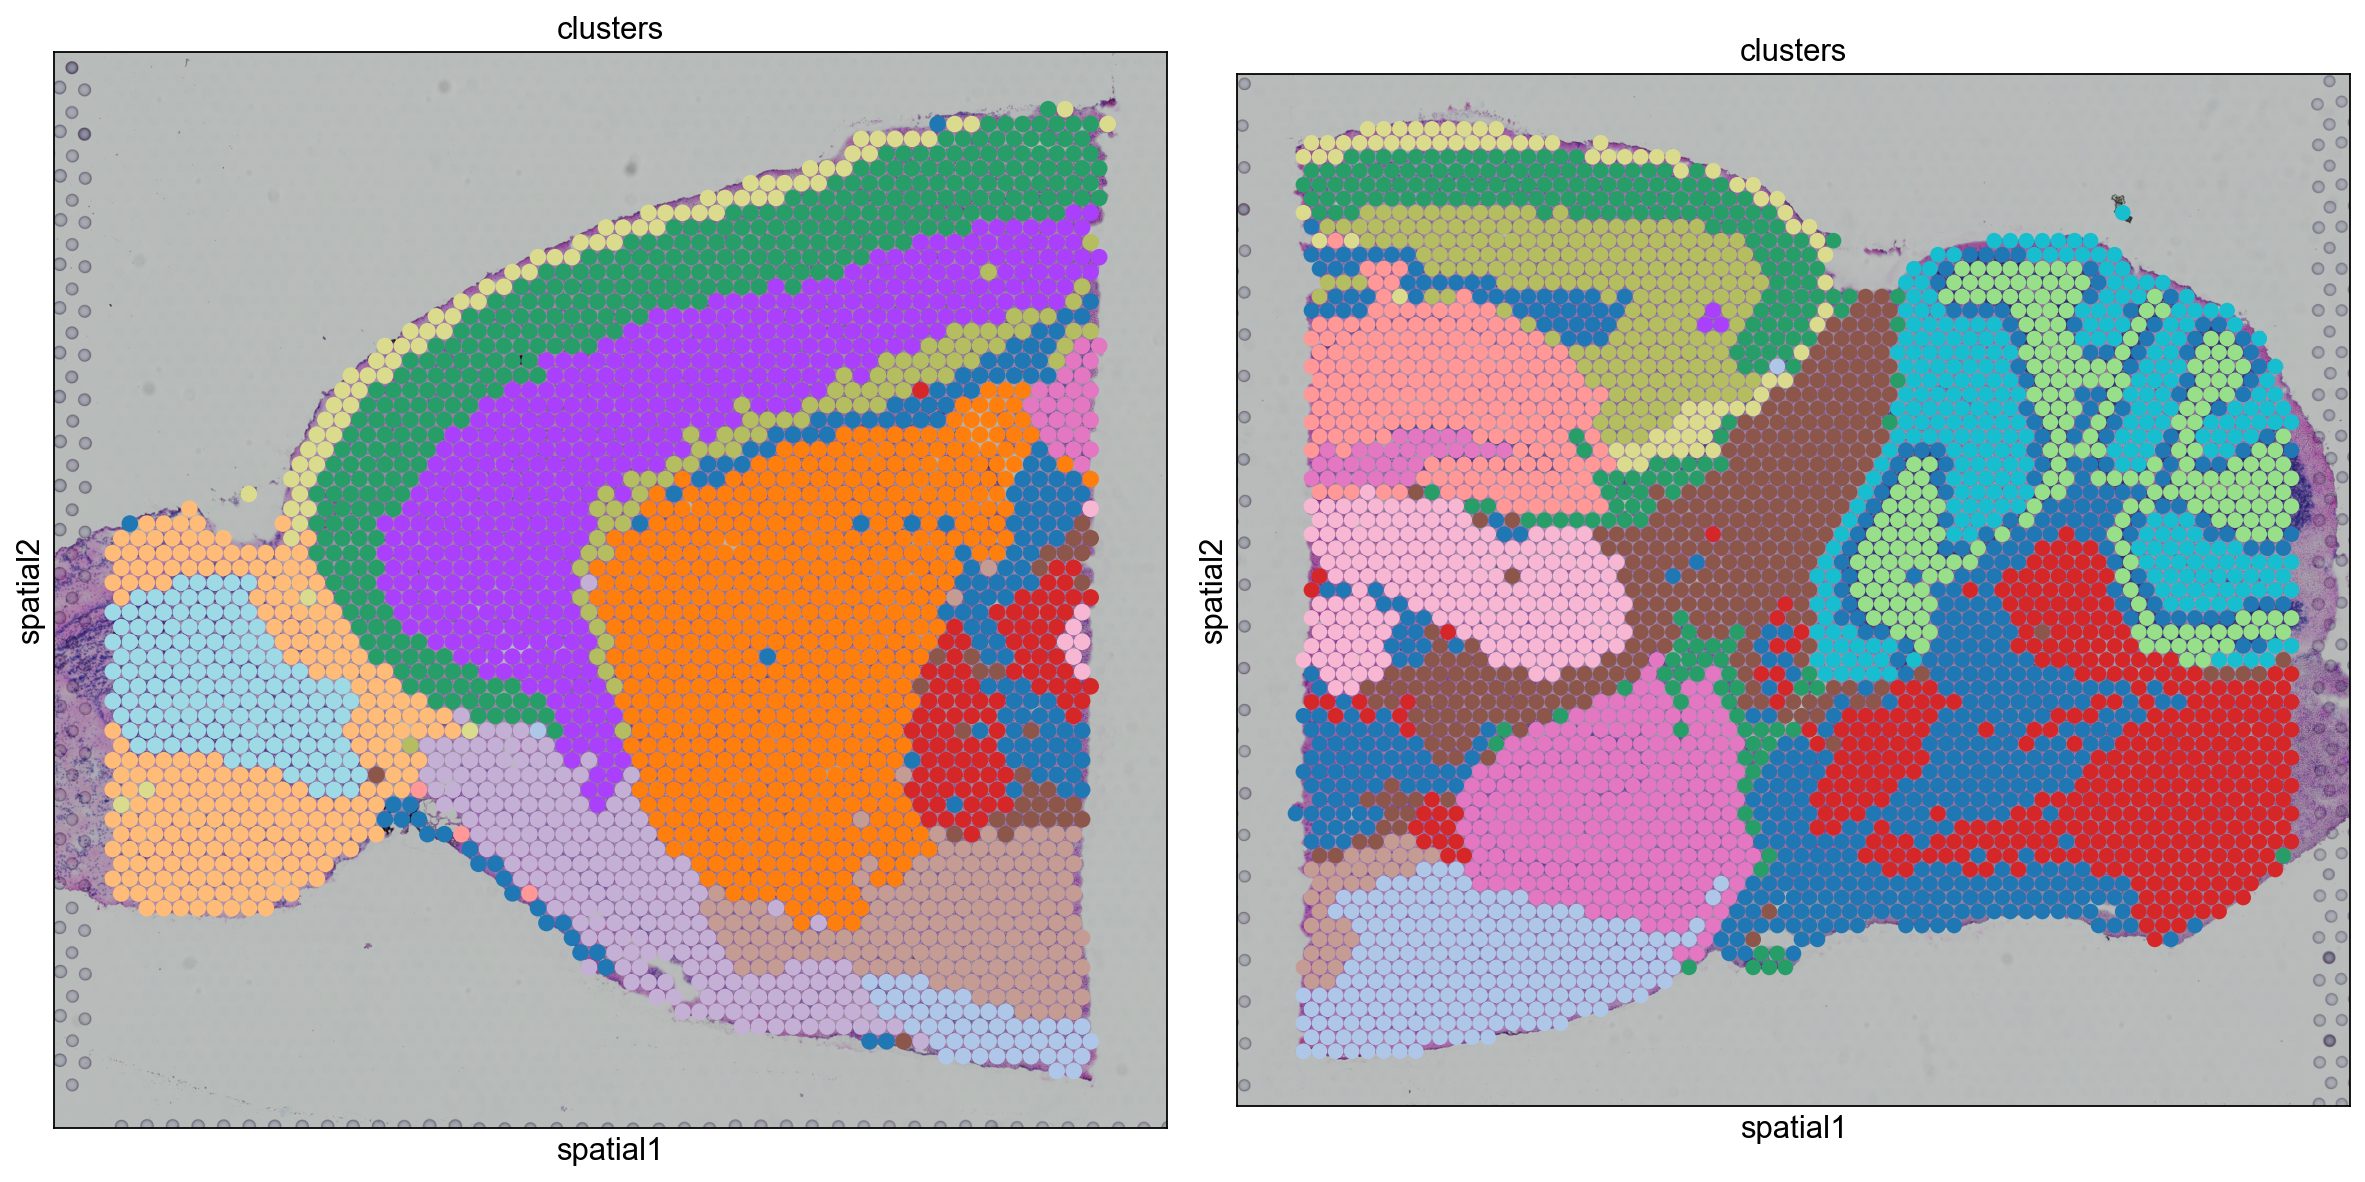

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

for i, library in enumerate(
    ["V1_Mouse_Brain_Sagittal_Anterior", "V1_Mouse_Brain_Sagittal_Posterior"]
):
    ad = adata_spatial[adata_spatial.obs.library_id == library, :].copy()
    sc.pl.spatial(
        ad,
        img_key="hires",
        library_id=library,
        color="clusters",
        size=1.5,
        palette=[
            v
            for k, v in clusters_colors.items()
            if k in ad.obs.clusters.unique().tolist()
        ],
        legend_loc=None,
        show=False,
        ax=axs[i],
    )

plt.tight_layout()

In [26]:
adata_cortex = sc.read("/Users/sadeq/Desktop/scanpy-practice/adata_processed_sc.h5ad")

/Users/sadeq/opt/anaconda3/lib/python3.8/site-packages/anndata/compat/__init__.py:180: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/Users/sadeq/opt/anaconda3/lib/python3.8/site-packages/anndata/compat/__init__.py:180: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [27]:
adata_anterior_subset = adata_spatial_anterior[
    adata_spatial_anterior.obsm["spatial"][:, 1] < 6000, :
]
adata_posterior_subset = adata_spatial_posterior[
    (adata_spatial_posterior.obsm["spatial"][:, 1] < 4000)
    & (adata_spatial_posterior.obsm["spatial"][:, 0] < 6000),
    :,
]

In [28]:
adatas_anterior = [adata_cortex, adata_anterior_subset]
adatas_posterior = [adata_cortex, adata_posterior_subset]


# Integration.
integrated_anterior, corrected_anterior = scanorama.correct_scanpy(
    adatas_anterior, return_dimred=True
)
integrated_posterior, corrected_posterior = scanorama.correct_scanpy(
    adatas_posterior, return_dimred=True
)

Found 20538 genes among all datasets
[[0.         0.28467909]
 [0.         0.        ]]
Processing datasets (0, 1)
Found 20538 genes among all datasets
[[0.         0.30405405]
 [0.         0.        ]]
Processing datasets (0, 1)


In [29]:
adata_cortex_anterior = adata_cortex.concatenate(
    adata_anterior_subset,
    batch_key="dataset",
    batch_categories=["smart-seq", "visium"],
    join="outer",
    uns_merge="first",
)
adata_cortex_posterior = adata_cortex.concatenate(
    adata_posterior_subset,
    batch_key="dataset",
    batch_categories=["smart-seq", "visium"],
    join="outer",
    uns_merge="first",
)

In [ ]:
embedding_anterior = np.concatenate(integrated_anterior, axis=0)
adata_cortex_anterior.obsm["scanorama_embedding"] = embedding_anterior

embedding_posterior = np.concatenate(integrated_posterior, axis=0)
adata_cortex_posterior.obsm["scanorama_embedding"] = embedding_posterior

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from nested sequences exceeding the maximum number of dimensions of 32 is deprecated. If you mean to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
from sklearn.metrics.pairwise import cosine_distances

distances_anterior = 1 - cosine_distances(
    adata_cortex_anterior[adata_cortex_anterior.obs.dataset == "smart-seq"].obsm[
        "scanorama_embedding"
    ],
    adata_cortex_anterior[adata_cortex_anterior.obs.dataset == "visium"].obsm[
        "scanorama_embedding"
    ],
)
distances_posterior = 1 - cosine_distances(
    adata_cortex_posterior[adata_cortex_posterior.obs.dataset == "smart-seq"].obsm[
        "scanorama_embedding"
    ],
    adata_cortex_posterior[adata_cortex_posterior.obs.dataset == "visium"].obsm[
        "scanorama_embedding"
    ],
)

In [ ]:
def label_transfer(dist, labels):
    lab = pd.get_dummies(labels).to_numpy().T
    class_prob = lab @ dist
    norm = np.linalg.norm(class_prob, 2, axis=0)
    class_prob = class_prob / norm
    class_prob = (class_prob.T - class_prob.min(1)) / class_prob.ptp(1)
    return class_prob

In [ ]:
class_prob_anterior = label_transfer(distances_anterior, adata_cortex.obs.cell_subclass)
class_prob_posterior = label_transfer(
    distances_posterior, adata_cortex.obs.cell_subclass
)

In [ ]:
cp_anterior_df = pd.DataFrame(
    class_prob_anterior, columns=np.sort(adata_cortex.obs.cell_subclass.unique())
)
cp_posterior_df = pd.DataFrame(
    class_prob_posterior, columns=np.sort(adata_cortex.obs.cell_subclass.unique())
)

cp_anterior_df.index = adata_anterior_subset.obs.index
cp_posterior_df.index = adata_posterior_subset.obs.index

In [ ]:
adata_anterior_subset_transfer = adata_anterior_subset.copy()
adata_anterior_subset_transfer.obs = pd.concat(
    [adata_anterior_subset.obs, cp_anterior_df], axis=1
)

adata_posterior_subset_transfer = adata_posterior_subset.copy()
adata_posterior_subset_transfer.obs = pd.concat(
    [adata_posterior_subset.obs, cp_posterior_df], axis=1
)

In [ ]:
sc.pl.spatial(
    adata_anterior_subset_transfer,
    img_key="hires",
    color=["L2/3 IT", "L4", "L5 PT", "L6 CT"],
    size=1.5,
)
sc.pl.spatial(
    adata_posterior_subset_transfer,
    img_key="hires",
    color=["L2/3 IT", "L4", "L5 PT", "L6 CT"],
    size=1.5,
)

In [ ]:
sc.pl.spatial(
    adata_anterior_subset_transfer, img_key="hires", color=["Oligo", "Astro"], size=1.5
)
sc.pl.spatial(
    adata_posterior_subset_transfer, img_key="hires", color=["Oligo", "Astro"], size=1.5
)